# BISI CST2101 Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

### Q1: Import the necessary libraries and briefly explain the use of each library (1 Mark)

In [3]:
# remove _____ & write the appropriate library name

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You don't have to explain about these libraries below
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Write your Answer here: 

Ans 1: Numpy: Numpy is a python library used for working with large multi-dimensional Arrays. With Numpy we can also perform Arithmetic functions.

Pandas: Pandas is a python library used to work with datasets. It has functions which can be used for cleaning, analyzing, exploring and manipulating data.

Seaborn: Seaborn is a data visualization library used in python or ML built on Matplotlib. It is used to visualize more complex data and statistical plots and provides more color options as well. 

Matplotlib.pyplot: Matplotlib is also a data visualization library in python used to create plots and visualizations. 

### Q2: Read the given dataset (1 Mark)

In [4]:
#remove _____ & write the appropriate function name

pima = pd.read_csv("Z:\BI PROG FINAL\diabetes.csv")

### Q3. Show the last 5 records of the dataset (1 Mark)

In [5]:
#remove ______ and write the appropriate number in the function

pima.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
995,2,173,79,32,474,35.504233,0.402867,21,1
996,13,132,70,30,111,35.271769,0.168845,42,1
997,3,132,87,44,156,34.794755,0.765003,29,1
998,0,140,0,0,0,41.926693,0.209833,28,1
999,4,93,59,35,93,45.914499,0.737636,29,1


### Q4. Show the first 5 records of the dataset (1 Mark)

In [6]:
#remove _____ & write the appropriate function name and the number of rows to get in the output

pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Q5. Find the dimension of the `pima` dataframe. What do you understand by the dimension of the dataset? (1 Mark)

In [7]:
#remove _____ & write the appropriate function name

pima.shape

(1000, 9)

#### Write your Answer here: 


Ans 5: Dimension of the dataset means the number of rows and columns in the file i.e. 'Shape'

### Q6. Find the size of the `pima` dataframe. (1 Mark)

In [8]:
#remove _____ & write the appropriate function name

pima.size

9000

#### Write your Answer here: 


Ans 6: The size of the Pima Dataframe is 9000

### Q7. Display the data types of all the variables in the data set? (1 Mark)


In [10]:
#remove _____ & write the appropriate function name

pima.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Q8. Are there any missing values in the `pima` dataframe?  Which variables have missing values? (1 Mark)

In [11]:
#remove _____ & write the appropriate function name

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Write your Answer here: 


Ans 8: No, there are no missing values in any variables in the pima dataframe. 

### Q9. Find the summary statistics for all variables except for  `'Outcome'` variable? Choose any one column/variable and explain all the statistical measures. (2 Marks)

In [12]:
#remove _____ & write the appropriate function name

pima.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.051000,125.21600,69.072000,20.755000,83.086000,32.664772,0.494090,33.830000
std,3.325576,32.27772,20.465328,16.008599,117.255326,7.563614,0.322158,11.268189
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,28.275000,0.258750,25.000000
50%,3.000000,122.00000,72.000000,24.000000,23.000000,32.800000,0.408500,30.000000
75%,6.000000,146.00000,80.000000,33.000000,133.500000,36.900000,0.658500,41.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### Write your Answer here: 


Ans 9: Choosing Glucose as the variable below are the statistics.
Glucose: 
count: 	1000 - The total number of entries
mean: 	125.21600 - This is the mean value of the variable Glucose
std: 	32.27772 - This is the standard deviation which is average deviation of each entry from mean
min: 	0 - The minimum value in variable Glucose
25%: 	102 - Number of entries fall under value 102
50%: 	122 - Number of entries fall under value 122
75%: 	146 - Number of entries fall under value 146
max: 	199 - The max value in the variable Glucose 


### Q10. Plot the distribution plot for the variable `'BloodPressure'`. Write your observations from the plot. (2 Marks)

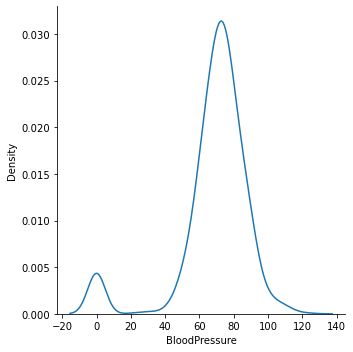

In [13]:
#remove _____ & write the appropriate library name

sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

#### Write your Answer here: 


Ans 10: The above plot shows the Blood Pressure with respect to Density where blood pressure ranges from -20 to 140 and density ranges from 0.00 - 0.030. The above visuals shows that Density is highest of people with blood pressure 70 and lowest with blood pressure ranging from 10-40 and 110-140. Also there is a small rise in density at the people having blood pressure 0. 

### Q11. What is the `'BMI'` for the person having the highest `'Glucose'`? (1 Mark)

In [14]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

#### Write your Answer here: 


Ans 11: The BMI of the person having highest Glucose (199) is 42.9

### Q12.
#### 12.1 What is the mean of the variable `'BMI'`? 
#### 12.2 What is the median of the variable `'BMI'`? 
#### 12.3 What is the mode of the variable `'BMI'`?
#### 12.4 Are the three measures of central tendency equal?

### (2 Marks)

In [15]:
#remove _____ & write the appropriate function name

m1 = pima['BMI'].mean()  #Mean
print(m1)
m2 = pima['BMI'].median()  #Median
print(m2)
m3 = pima['BMI'].mode()[0]  #Mode
print(m3)

32.664772391408796
32.8
32.0


#### Write your Answer here: 


Ans 12: Mean of BMI = 32.664772391408796
        Median of BMI = 32.8
        Mode Of BMI = 32.0
        The 3 measures of central tendency are nearly equal as stated above.

### Q13. How many women's `'Glucose'` level is above the mean level of `'Glucose'`? (1 Mark)

In [16]:
#remove _____ & write the appropriate function name

pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

449

#### Write your Answer here: 


Ans 13: 449 women Glucose level is above the mean level of Glucose 

### Q14. Create the pairplot for variables `'Glucose'`, `'SkinThickness'` and `'DiabetesPedigreeFunction'`. Write you observations from the plot. (2 Marks)

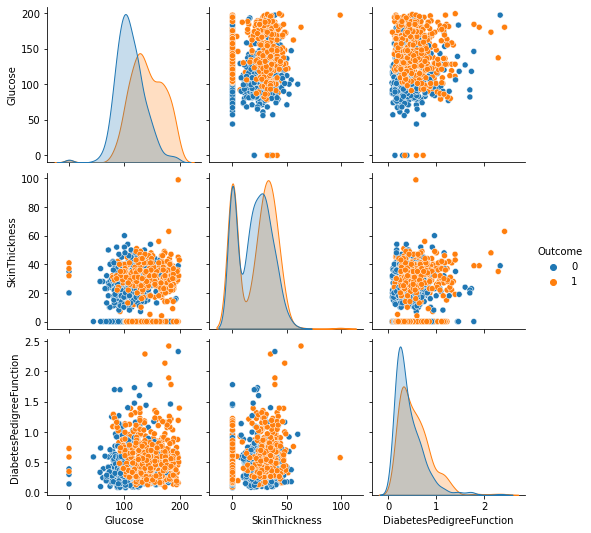

In [17]:
#remove _____ & write the appropriate function and argument names

sns.pairplot(data=pima, vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

#### Write your Answer here: 


Ans 14: The above plot has 2 outcomes '1 = Diabetic' and '0 = Non - Diabetic'. Now Speaking about Glucose to SkinThickness, women with glucose < 100 are moreover non diabetic and glucose > 100 are majorly diabetic, the SkinThickness of all women ranges from 0-50 with one potential outlier which is a diabetic woman with SkinThickness just under 100. The correlation coefficient (r=0). We can also see a clear pattern or a straight line where women with Glucose < 100 are non-diabetic and just as it increases 100+ there is a sudden spike in Diabetes. 

Now Glucose to DiabetesPedigreeFunction we can draw a positive linear line but the strenght is weak. Here also women with Glucose > 100 are diabetic with DPF ranging from 0-2 and Glucose < 100 are majorly non diabetic with DPF ranging from 0-2. 

With respect to SkinThickness to DPF we can draw a curved line but again the strenght is weak and also 'r' maybe just above 0 as strenght looks a little good with a curve line. There is one potential outlier where the woman is diabetic with DPF = 0.5 and SkinThickness = 100

Now for the ratio of DPF to Glucose we can clearly draw a linear line with positive direction but the strength is weak. The Correlation Coefficient = 0 as majority of points are not close to the imaginary line. 

So Concluding, there is a potential outlier with SkinThickness <=100. 


### Q15. Plot the scatterplot between `'Glucose'` and `'Insulin'`. Write your observations from the plot. (1 Mark)

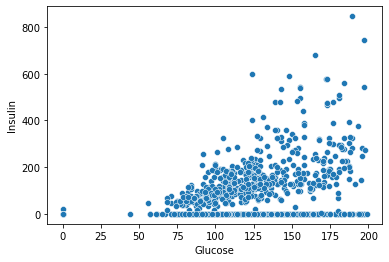

In [18]:
#remove _____ & write the appropriate function name

sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

#### Write your Answer here: 


Ans 15: According to my observations we can clearly draw a Linear line with a positive direction but the strength is weak. Here as the 'Insulin' increases the 'Glucose' also increases which is a trend that can be observed. We can also look at a pattern of straight line where the Glucose level increases from 0-199 to the max but the insulin remains 0 which is strange.  

### Q16. Plot the boxplot for the 'Age' variable. Are there outliers? (1 Mark)

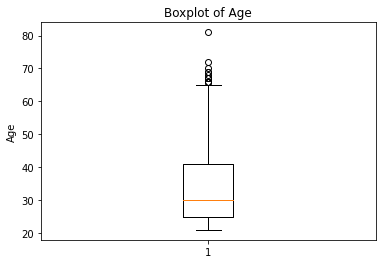

In [19]:
#remove _____ & write the appropriate function and column name 

plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

#### Write your Answer here: 


Ans 16: Yes there are some potential outliers in the above figure as the points are beyond the upper whisker.  

### Q17. Find and visualize the the correlation matrix. Write your observations from the plot. (1 Mark)

In [20]:
#remove _____ & write the appropriate function name and run the code

corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.112930,0.127463,-0.080033,-0.064909,0.012920,-0.025452,0.548665
Glucose,0.112930,1.000000,0.134993,0.050656,0.334175,0.222138,0.127004,0.255567
BloodPressure,0.127463,0.134993,1.000000,0.249063,0.117369,0.247275,0.059303,0.240416
SkinThickness,-0.080033,0.050656,0.249063,1.000000,0.472663,0.387055,0.214026,-0.121236
Insulin,-0.064909,0.334175,0.117369,0.472663,1.000000,0.198281,0.180284,-0.039887
BMI,0.012920,0.222138,0.247275,0.387055,0.198281,1.000000,0.163270,0.023921
DiabetesPedigreeFunction,-0.025452,0.127004,0.059303,0.214026,0.180284,0.163270,1.000000,0.006809
Age,0.548665,0.255567,0.240416,-0.121236,-0.039887,0.023921,0.006809,1.000000


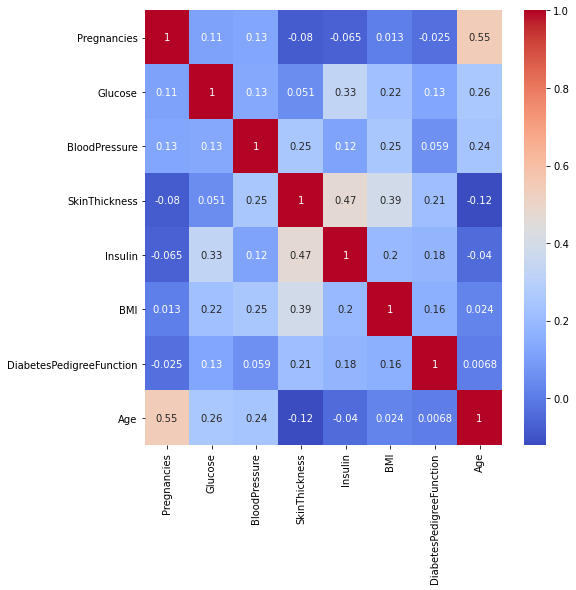

In [21]:
#remove _____ & write the appropriate function name

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

# display the plot
plt.show()

#### Write your Answer here: 


Ans 17: The diagonal of any heatmap represents the correlation of each variable with itself, which is always 1 and shows perfect positive correlation. Also the heatmap is always symmetric diagonally so correlation of A-B is same as B-A. Now speaking of High Positive Correlation which is Age-Pregnancies and vice-versa and, speaking of high negative correlation which is Age-SkinThickness and vice-versa. 

## Model Training

### Q18. Split and scale the data (2 Mark)

In [22]:
# Split the data into dependent and independent variables
# remove _____ & write the appropriate function variable name
y = pima['Outcome']
x = pima.drop('Outcome', axis = 1)

In [23]:
# Using StandarScaler scale the data
# remove _____ & write the appropriate function function name

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [24]:
# Splitting the data into train and test. Use test size as 15%
# remove _____ & complete the code

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify=y,  random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)

(850, 8)
(850,)
(150, 8)
(850,)


### Q19. Train a Logistic Regression Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [25]:
# remove _____ & complete the code

# import the model
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Instantiate the model
lr = LogisticRegression(max_iter=1500)

# Fit the model on the train set
m = lr.fit(x_train_scaled, y_train)

# Predict on x_test_scaled, using scaled values as otherwise it would give a value error
y_pred = m.predict(x_test_scaled)

# Evaluate the model
print('Accuracy of LRM on the train set: {:.3f}'.format(m.score(x_train_scaled, y_train)))
print('Accuracy of LRM on the test set: {:.3f}'.format(m.score(x_test_scaled, y_test)))

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


Accuracy of LRM on the train set: 0.759
Accuracy of LRM on the test set: 0.753


array([[60, 15],
       [22, 53]], dtype=int64)

#### Write your Answer here: 


Ans 19: Accuracy on the train dataset is 75.7% whereas on accuracy on test datset is 75.5%.
True Positive:73 and True Negative:78

### Q20. Train a Random Forest Model. What is the Accuracy and how many True Positives and True Negatives did you get? (3 Marks)

In [26]:
#remove _____ & complete the code

# Import the Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model. 
rf = RandomForestClassifier(n_estimators=301, max_depth=3)

# fit the model on the train set
m2 = rf.fit(x_train, y_train)

# Predict on x_test
y_pred2 = m2.predict(x_test)

# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(m2.score(x_train, y_train)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(m2.score(x_test, y_test)))
confusion_matrix(y_test, y_pred2)

Accuracy of Random Forest model on the train set: 0.82
Accuracy of Random Forest model on the test set: 0.79


array([[57, 18],
       [14, 61]], dtype=int64)

#### Write your Answer here: 

Ans 20: Accuracy of RFM on train set is 82% whereas on test set it's 77%
True Positive:80 and True Negative:74

### Q21. Which model performed better? (1 Mark)

#### Write your Answer here: 

Ans 21:

Random Forest Model performed better when compared to Logistic regression model based on accuracy and performance.